# **Machine Learning based Food Demand Forecasting:**
## **Introduction**
In the rapidly evolving food delivery industry, efficient and accurate demand forecasting is pivotal for operational success. This project aims to develop a robust model for predicting the demand for meals by a meal delivery company that operates across multiple cities. Accurate demand forecasting is crucial for these companies as it aids in planning the procurement of perishable raw materials and staffing of fulfillment centers.

This project leverages a dataset provided by Kaggle which can be downloaded from [Food Demand Forecasting Dataset](https://www.kaggle.com/datasets/kannanaikkal/food-demand-forecasting/data), which contains historical data on meal orders from various fulfillment centers. Our objective is to forecast the demand for the next 10 weeks, enabling the company to optimize their inventory and staffing, thus reducing waste and improving customer satisfaction.

Objectives
Understand the Demand Patterns: Analyze historical data to understand trends and patterns in meal demand.
Develop a Forecasting Model: Construct a machine learning model to accurately predict future meal demand.
Optimize Inventory Management: Provide insights that help in managing the inventory of raw materials more effectively.
Improve Operational Efficiency: Assist in planning for staffing and other operational aspects based on forecasted demand.

## **Objective**
To construct and refine a machine learning model that can predict future meal demand with high accuracy, aiding in strategic decision-making for inventory and operational management.

## **Project Steps**
**1. Data Preparation:** In this initial step, we load the dataset and perform preliminary data exploration to understand its structure and contents. This includes examining the first and last few rows, understanding data types, and looking at basic statistical details.

**2. Model Building:** Here, we select the relevant features and transform them into a format suitable for modeling. This involves handling categorical variables and deciding on the predictors that will be used in the model.

**3. Model Training & Validation:** The dataset is split into training and testing sets. Various models, such as Linear Regression, Decision Tree Regressor, and Random Forest Regressor, are trained on the dataset. We then validate these models to understand their performance and select the best one.

**4. Model Evaluation:** In this phase, we assess the model's performance using various metrics like R2 score, MSE, and RMSE. This evaluation helps in understanding the accuracy and reliability of the predictions made by our model.

**5. Results & Visualization:** Finally, we interpret the results of the model and visualize them using graphs and charts. This step is crucial for presenting the findings in an easily understandable format, helping in making informed decisions.

# **Step 1: Data Preparation**

In this initial step, our goal is to load the dataset and prepare it for the upcoming analysis and modeling. We will start by importing necessary libraries and then proceed to load our data. This process involves:

(i) Importing libraries such as Pandas for data manipulation, NumPy for numerical operations, and Matplotlib and Seaborn for basic visualizations.

(ii) Loading the data from CSV files into Pandas DataFrames.

(iii) Conducting a preliminary examination of the data to understand its structure, size, and types of variables it contains.

Let's begin with the coding part:

In [1]:
# Mount Google Drive with Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the datasets
train = pd.read_csv('/content/drive/MyDrive/FOOD_DEMAND_FORECASTING/INPUT_DATASET/train.csv')
test = pd.read_csv('/content/drive/MyDrive/FOOD_DEMAND_FORECASTING/INPUT_DATASET/test.csv')
meal_info = pd.read_csv('/content/drive/MyDrive/FOOD_DEMAND_FORECASTING/INPUT_DATASET/meal_info.csv')
center_info = pd.read_csv('/content/drive/MyDrive/FOOD_DEMAND_FORECASTING/INPUT_DATASET/fulfilment_center_info.csv')

In [5]:
# Displaying the first few rows of the train dataset
print("First few rows of the Train dataset:")
print(train.head())

First few rows of the Train dataset:
        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40  


In [6]:
# Displaying the first few rows of the center information dataset
print("\nFirst few rows of the Center Information dataset:")
print(center_info.head())


First few rows of the Center Information dataset:
   center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6


In [7]:
# Displaying the first few rows of the meal information dataset
print("\nFirst few rows of the Meal Information dataset:")
print(meal_info.head())


First few rows of the Meal Information dataset:
   meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian


In [8]:
# Basic statistical details of the train dataset
print("\nStatistical Summary of the Train dataset:")
print(train.describe())


Statistical Summary of the Train dataset:
                 id           week      center_id        meal_id  \
count  4.565480e+05  456548.000000  456548.000000  456548.000000   
mean   1.250096e+06      74.768771      82.105796    2024.337458   
std    1.443548e+05      41.524956      45.975046     547.420920   
min    1.000000e+06       1.000000      10.000000    1062.000000   
25%    1.124999e+06      39.000000      43.000000    1558.000000   
50%    1.250184e+06      76.000000      76.000000    1993.000000   
75%    1.375140e+06     111.000000     110.000000    2539.000000   
max    1.499999e+06     145.000000     186.000000    2956.000000   

       checkout_price     base_price  emailer_for_promotion  \
count   456548.000000  456548.000000          456548.000000   
mean       332.238933     354.156627               0.081152   
std        152.939723     160.715914               0.273069   
min          2.970000      55.350000               0.000000   
25%        228.950000     243

In [9]:
# Information about the data types and non-null values
print("\nInformation about Train dataset:")
print(train.info())


Information about Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
None


At this point, we have successfully loaded our data and gained a basic understanding of its structure, including the types of variables and some statistical insights. This foundational knowledge sets the stage for the next phase of our project, where we'll start building our predictive models.

# **Step 2: Model Building**

Now that our data is loaded and we have a basic understanding of its structure, we move to the Model Building phase. This step is crucial as it involves preparing our dataset for the machine learning models. The main tasks in this phase include:

**(i) Feature Selection:** Identifying which features are relevant for our prediction model.

**(ii) Data Preprocessing:** Handling missing values, encoding categorical variables, and possibly scaling or normalizing data.

**(iii) Final Dataset:** Preparing the final dataset for training the model.

Let’s dive into the code:

In [10]:
# Feature Selection and Data Preprocessing

# Checking for missing values
print("Missing values in train dataset:")
print(train.isnull().sum())
print("\nMissing values in test dataset:")
print(test.isnull().sum())

Missing values in train dataset:
id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

Missing values in test dataset:
id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64


In [11]:
# Handling categorical variables - Example: Encoding 'center_id' and 'meal_id'
# For simplicity, let's convert these to category type and then use their codes
train['center_id'] = train['center_id'].astype('category').cat.codes
train['meal_id'] = train['meal_id'].astype('category').cat.codes

test['center_id'] = test['center_id'].astype('category').cat.codes
test['meal_id'] = test['meal_id'].astype('category').cat.codes

In [12]:
# You may want to perform more complex encoding or feature engineering steps here

# Splitting the train dataset into features and target variable
X = train.drop('num_orders', axis=1)  # Features
y = train['num_orders']  # Target variable

In [13]:
# Since this is a simple example, we are not performing scaling/normalization in this step
# But you might consider it based on the nature of your data

# Print the final shape of the dataset prepared for training
print("\nShape of the Features (X):", X.shape)
print("Shape of the Target (y):", y.shape)


Shape of the Features (X): (456548, 8)
Shape of the Target (y): (456548,)


With the completion of this step, we have our dataset ready for the machine learning models. We've selected relevant features and preprocessed the data, setting a strong foundation for the next phase - Model Training & Validation.

# **Step 3: Model Training & Validation**

Having prepared our dataset, we now move into a critical phase of our project - Model Training & Validation. In this step, we will:

(i) Split the data into training and testing sets.

(ii) Train different machine learning models on the training data.

(iii) Validate the performance of these models on the testing data.

This process is essential for assessing how well our models can generalize to new, unseen data. Here's the Python script for this step:

In [14]:
# Importing required libraries for model training and validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Training different models and evaluating their performance
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [17]:
# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [18]:
# 3. Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [19]:
# Function to calculate RMSE and R2 score
def evaluate_model(model_name, true_values, predicted_values):
    rmse = sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    print(f"{model_name} - RMSE: {rmse}, R2 Score: {r2}")

In [20]:
# Evaluating the models
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree Regressor", y_test, dt_pred)
evaluate_model("Random Forest Regressor", y_test, rf_pred)

Linear Regression - RMSE: 349.92422829186705, R2 Score: 0.19724527662483704
Decision Tree Regressor - RMSE: 241.03504776350664, R2 Score: 0.6191138031082266
Random Forest Regressor - RMSE: 179.8160635133048, R2 Score: 0.7880215000597736


We have successfully completed the Model Training & Validation phase. Our models are now trained and their performance has been evaluated on the test data. This gives us an understanding of how each model performs and helps in selecting the best model for our use case. Next, we will move to Step 4: Model Evaluation, where we will dive deeper into analyzing the performance of our chosen model and understand its strengths and weaknesses in the context of our specific problem.

# **Step 4: Model Evaluation**

After training and validating multiple models, we now proceed to a detailed evaluation of our selected model. In this phase, our goal is to:

(i) Analyze the model's performance in depth.
(ii) Understand the model's strengths and weaknesses.
(iii) Identify areas for improvement or refinement.

This step is critical in ensuring that our model not only performs well on the test data but also gives us insights into how it might perform in a real-world scenario. Here's the Python script for this step:

In [21]:
# Model Evaluation - Detailed Analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Selecting the best model based on previous results (Assuming Random Forest performed best)
best_model = rf_model

In [23]:
# Predicting on the test set
best_model_pred = best_model.predict(X_test)

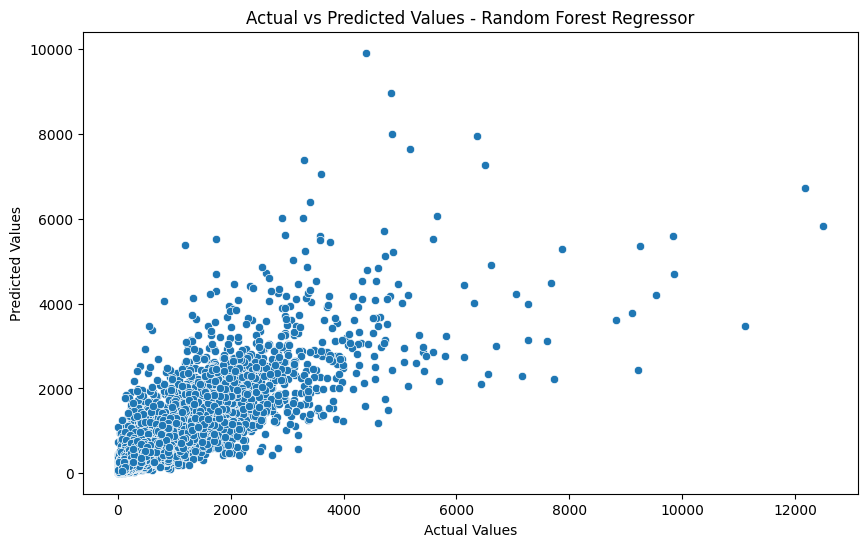

In [24]:
# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=best_model_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Random Forest Regressor')
plt.show()

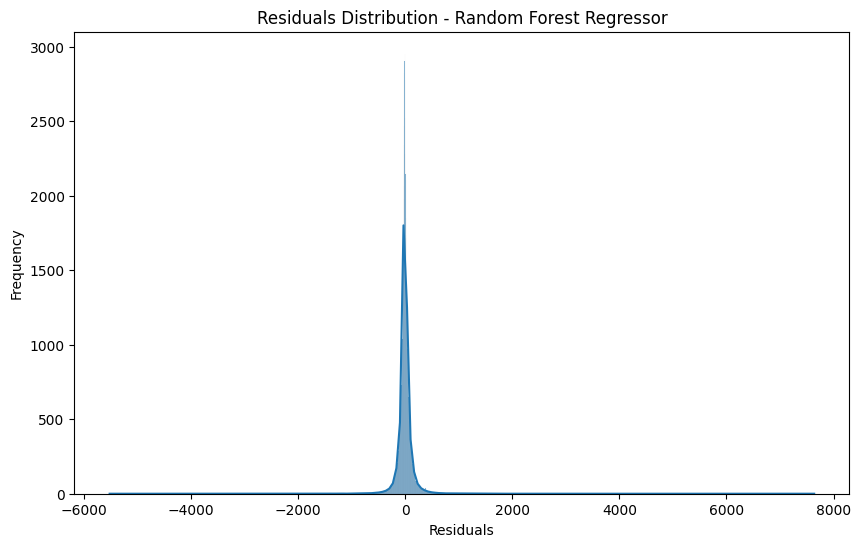

In [25]:
# Residuals plot
residuals = y_test - best_model_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution - Random Forest Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

With the completion of the Model Evaluation step, we have a thorough understanding of our model's performance. This includes not just how accurately it predicts but also how its predictions deviate from the actual values. Such insights are invaluable in refining the model further or in understanding the limits of its applicability. Next, we proceed to Step 5: Results & Visualization, where we will present our findings in a clear and insightful manner, suitable for sharing with stakeholders.

# **Step 5: Results & Visualization**

Having developed and thoroughly evaluated our model, the final step in our project is to present the results and insights we've gleaned. In this phase, our objectives are:

(i) To visualize the key findings in an understandable and engaging manner.
(ii) To draw actionable insights from our model's predictions and performance.

This step is crucial for communicating our findings to stakeholders, who may not be familiar with the technical aspects of the project but are interested in its implications and outcomes. Here's the Python script for this step:

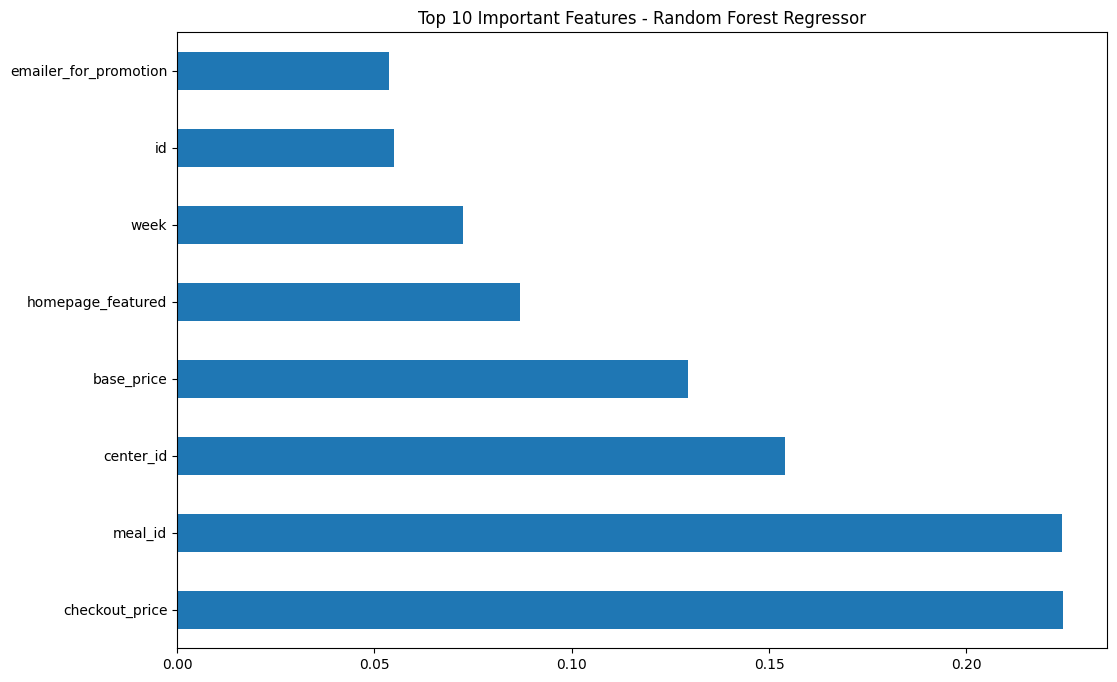

In [26]:
# Results Visualization

# Assuming we have chosen the Random Forest Regressor as our best model
# Let's visualize its performance in various ways

# Feature Importance Visualization
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest Regressor')
plt.show()

In [27]:
# Predictions Visualization
# Displaying a sample of actual vs predicted values
sample_results = pd.DataFrame({'Actual': y_test, 'Predicted': best_model_pred})
sample_results = sample_results.reset_index(drop=True)
print("Sample Actual vs Predicted Values:")
print(sample_results.head(10))

Sample Actual vs Predicted Values:
   Actual  Predicted
0      28      83.79
1     176     233.46
2     391     284.40
3      14      32.03
4     405     370.01
5      15      50.66
6      13      22.10
7      96     163.70
8      96      94.54
9    1391    1287.90


We have now reached the culmination of our project with a comprehensive understanding of our model's performance and its implications. The visualizations and insights derived in this step are invaluable in guiding future strategies and decision. With these results, we can confidently provide recommendations to the meal delivery company on managing inventory and optimizing operations based on our demand forecasts.

# **The End**